# Explore here

In [1098]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import *
from pickle import dump

In [1099]:
### DATA ANALYSIS FOR NATIONAL INSTITUTE OF DIABETES AND DIGESTIVE AND KIDNEY DISEASES
# Get Demographic Health data
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

In [1100]:
# Express Exploratory data analysis (EDA)
# Replace the zero values by the second minimum value in the "Glucose" column
df.loc[df['Glucose'] == 0, 'Glucose'] = df['Glucose'].sort_values().unique()[1]
# Replace the zero values by the second minimum value in the "BloodPressure" column
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = df['BloodPressure'].sort_values().unique()[1]
# Replace the zero values by the second minimum value in the "SkinThickness" column
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = df['SkinThickness'].sort_values().unique()[1]
# Replace the zero values by the second minimum value in the "Insulin" column
df.loc[df['Insulin'] == 0, 'Insulin'] = df['Insulin'].sort_values().unique()[1]
# Replace the zero values by the second minimum value in the "BMI" column
df.loc[df['BMI'] == 0, 'BMI'] = df['BMI'].sort_values().unique()[1]

In [1101]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Outcome'],axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [1102]:
# Create the Boosting Algorithm
gbc = GradientBoostingClassifier(n_estimators = 15, max_depth=3, learning_rate=0.1, max_features=2, random_state = 42)
# Train the model with the train data
gbc.fit(X_train, y_train)
# Make predictions with the test data
y_pred = gbc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [1103]:
# Accuracy of the Boosting model
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(accuracy_score(y_test, y_pred)))
print(f"Gradient Boosting Classifier accuracy is: {accuracy_score(y_test, y_pred)}")

Gradient Boosting Classifier accuracy is : 0.83
Gradient Boosting Classifier accuracy is: 0.8311688311688312


The Gradient Boosting was testing with different hyperparameters:
- n_estimators: 5, 10, 12, 15, 20, 30, 50.
- max_depth: 2, 3, 4.
- learning_rate: 0.01, , 0.09, 0.10, 0.11, 0.15, 0.2.

The best accuracy was for a Gradient Boosting model with 15 n_estimators, a max_depth of 3 and 2 max_features.

These are the accuracy metric for the Decision Tree models, the Random Forest(n_estimators=10, max_depth=4, random_state=42) and the Gradient Boosting model (n_estimators=15, max_depth=3, max_features=2, random_state=42):
- Simple Tree Decision model for test data: 0.63
- Complex Tree Decision model for test data: 0.74
- Random Forest model for test data: 0.81
- Gradient Boosting model for test data: 0.83

This Gradient Boosting model is better than the Simple Decision Tree, the Complex Decision Tree and the Random Forest models.

In [1104]:
# Outcomes for y_pred
unique, counts = np.unique(y_pred, return_counts=True)
outcomes_pred = np.column_stack((unique, counts))
print(outcomes_pred)

[[  0 113]
 [  1  41]]


In [1105]:
# Outcomes for y_test
unique_test, counts_t = np.unique(y_test, return_counts=True)
outcomes_test = np.column_stack((unique_t, counts_t))
print(outcomes_test)

[[ 0 99]
 [ 1 55]]


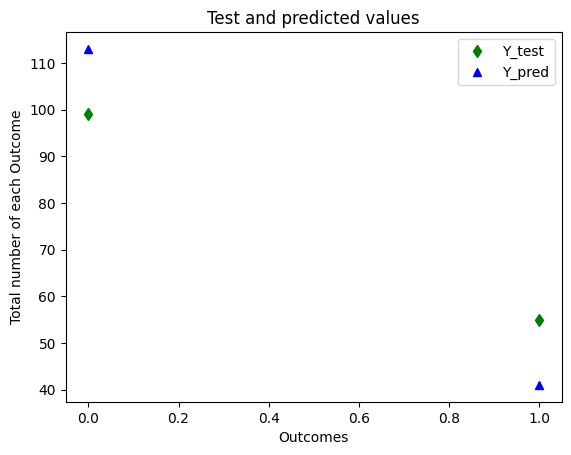

In [1106]:
# Plot the total Outcome for y_test and for y_pred values
plt.figure()
plt.plot(outcome_test[:,1],"gd",label="Y_test")
plt.plot(outcomes_pred[:,1],"b^",label="Y_pred")
plt.ylabel("Total number of each Outcome")
plt.xlabel("Outcomes")
plt.title("Test and predicted values")
plt.legend(loc='best')
plt.show()

In [1107]:
from pickle import dump

dump(model, open("../models/gradientboosting_classifier_nestimators-12_mdepth-3_maxf_2_42.sav", "wb"))